**Table of contents**<a id='toc0_'></a>    
- [Updating in realtime](#toc1_1_)    
- [Drawing a line between the selected points](#toc2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
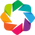

In [5]:
# import rhkpy as rk
import numpy as np
import xarray as xr
import hvplot.xarray
import holoviews as hv
from holoviews import streams
import panel as pn
hv.extension('bokeh')

In [6]:
# Create a sample xarray DataArray with random 2D data
data = np.random.rand(10, 10)
coords = {'y': np.arange(10), 'x': np.arange(10)}
dataarray = xr.DataArray(data, coords=coords, dims=['y', 'x'])

In [7]:
# List to store clicked coordinates
clicked_coords = []

# Function to handle taps
def tap_handler(x, y):
    global plot
    
    if len(clicked_coords) < 2:
        clicked_coords.append((x, y))
        
    if len(clicked_coords) == 2:
        annotations = [hv.Text(x, y, f"({x:.2f}, {y:.2f})").opts(text_color='white') for x, y in clicked_coords]
        overlay = plot * hv.Overlay(annotations)
        hv.extension('bokeh')
        display(overlay)
    else:
        display(plot)

# Function to use stored coordinates later
def process_coords():
    for x, y in clicked_coords:
        # Process coordinates here
        print(f"Processing: x={x}, y={y}")
        print(f"Data value: {dataarray.sel(x=x, y=y, method='nearest').item()}")

In [8]:
# Attach tap stream
plot = dataarray.hvplot.image(aspect = 'equal')
tap = hv.streams.Tap(transient = True, source = plot)
tap.add_subscriber(tap_handler)

In [9]:
plot

BokehModel(combine_events=True, render_bundle={'docs_json': {'252c6250-2b7e-42a7-b17e-12fb7e01566f': {'version…

In [10]:
process_coords()

## <a id='toc1_1_'></a>[Updating in realtime](#toc0_)

In [11]:
# Create a sample xarray DataArray with random 2D data
data = np.random.rand(10, 10)
coords = {'y': np.arange(10), 'x': np.arange(10)}
dataarray = xr.DataArray(data, coords=coords, dims=['y', 'x'])

# List to store clicked coordinates
clicked_coords = []

# Function to handle taps
def tap_handler(x, y):
    if x is not None and y is not None and len(clicked_coords) < 2:
        clicked_coords.append((x, y))
        print(f"Stored coordinates: {clicked_coords}")

# Function to return line based on clicked_coords
def draw_line():
    if len(clicked_coords) == 2:
        x1, y1 = clicked_coords[0]
        x2, y2 = clicked_coords[1]
        return hv.Path([[(x1, y1), (x2, y2)]], vdims=[]).opts(color='red', line_width=2)
    else:
        return hv.Path([], vdims=[])

# Function to reset clicked coordinates
def reset_coords(event):
    clicked_coords.clear()
    print("Coordinates reset.")
    
# Function to use stored coordinates later
def process_coords():
    for x, y in clicked_coords:
        # Process coordinates here
        print(f"Processing: x={x}, y={y}")
        print(f"Data value: {dataarray.sel(x=x, y=y, method='nearest').item()}")
        
# Create the initial plot
plot = dataarray.hvplot.image(rasterize=True, aspect='equal')

# DynamicMap to update line
dynamic_line = hv.DynamicMap(draw_line)

# Create an overlay of the plot and line
overlay = plot * dynamic_line

# Attach tap stream
tap = hv.streams.Tap(transient=True, source=plot)
tap.add_subscriber(tap_handler)

# Create Reset button
reset_button = pn.widgets.Button(name="Reset", width=100)
reset_button.on_click(reset_coords)

# Layout
layout = pn.Row(pn.Column(reset_button), overlay)
layout

BokehModel(combine_events=True, render_bundle={'docs_json': {'bc72ab5a-a47e-4cb3-9064-c19ca893c86b': {'version…

In [12]:
process_coords()

# <a id='toc2_'></a>[Drawing a line between the selected points](#toc0_)

In [ ]:
# Create a sample xarray DataArray with random 2D data
data = np.random.rand(10, 10)
coords = {'y': np.arange(10), 'x': np.arange(10)}
dataarray = xr.DataArray(data, coords=coords, dims=['y', 'x'])

# List to store clicked coordinates
clicked_coords = []

# Stream to trigger line display
line_stream = streams.Stream.define('Line', display=False)()

# Function to handle taps
def tap_handler(x, y):
    if x is not None and y is not None and len(clicked_coords) < 2:
        clicked_coords.append((x, y))
        print(f"Stored coordinates: {clicked_coords}")

# Function to return line based on clicked_coords
def draw_line():
    if len(clicked_coords) == 2:
        x1, y1 = clicked_coords[0]
        x2, y2 = clicked_coords[1]
        return hv.Path([[(x1, y1), (x2, y2)]], vdims=[]).opts(color='red', line_width=2)
    else:
        return hv.Path([], vdims=[])

# Function to display line based on clicked coordinates or fixed coordinates
def display_line(display):
    if display:
        if len(clicked_coords) >= 2:
            x1, y1 = clicked_coords[0]
            x2, y2 = clicked_coords[1]
        else:
            print('Please select two points.')
            x1, y1 = (0, 0)
            x2, y2 = (0, 0)
        return hv.Path([[(x1, y1), (x2, y2)]], vdims=[]).opts(color='red', line_width=2)
    else:
        return hv.Path([], vdims=[])


# Function to reset clicked coordinates and remove the line
def reset_coords(event):
    clicked_coords.clear()
    line_stream.event(display=False)
    print("Coordinates reset.")

# Function to show fixed line
def show_line(event):
    line_stream.event(display=True)

# Create the initial plot
plot = dataarray.hvplot.image(rasterize=True, aspect='equal')

# DynamicMap to update line based on clicks
dynamic_click_line = hv.DynamicMap(draw_line)

# DynamicMap to display fixed line
dynamic_fixed_line = hv.DynamicMap(display_line, streams=[line_stream])

# Create an overlay of the plot, dynamic line, and fixed line
overlay = plot * dynamic_click_line * dynamic_fixed_line

# Attach tap stream
tap = hv.streams.Tap(transient=True, source=plot)
tap.add_subscriber(tap_handler)

# Create Reset button
reset_button = pn.widgets.Button(name="Reset", width=100)
reset_button.on_click(reset_coords)

# Create Show Line button
show_line_button = pn.widgets.Button(name="Show Line", width=100)
show_line_button.on_click(show_line)

# Layout
layout = pn.Row(pn.Column(reset_button, show_line_button), overlay)
layout
